In [1]:
import pandas as pd


In [4]:
sales_data = pd.read_csv('/Users/guybasson/Desktop/sdatta-nlp/palmers_fashion/f_sales_v_fashion.csv')
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data['item'] = sales_data['sku'].astype(str)
sales_data['store'] = sales_data['store'].astype(str)
sales_data = sales_data.rename(columns={'total_sales':'sales'})
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990977 entries, 0 to 4990976
Data columns (total 7 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   sku                      int64         
 1   store                    object        
 2   date                     datetime64[ns]
 3   average_price            float64       
 4   average_dicounted_price  float64       
 5   sales                    float64       
 6   item                     object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 266.5+ MB


In [6]:
warehouse_data = pd.read_csv('/Users/guybasson/Desktop/sdatta-nlp/palmers_fashion/warehouse_stock_fashion.csv')
warehouse_data['valid_to_date'] = warehouse_data['valid_to_date'].replace('2099-12-31', sales_data['date'].max().strftime('%Y-%m-%d'))

In [125]:
warehouse_data['valid_to_date'].max()

'2023-12-11'

In [7]:
mbew_fashion = pd.read_csv('mbew_fashion.csv')
mbew_fashion['valid_to_date'] = mbew_fashion['valid_to_date'].replace('2099-12-31', sales_data['date'].max().strftime('%Y-%m-%d'))
mbew_fashion['valid_to_date'] = pd.to_datetime(mbew_fashion['valid_to_date'])
mbew_fashion['valid_from_date'] = pd.to_datetime(mbew_fashion['valid_from_date'])
mbew_fashion['item'] = mbew_fashion['sku'].astype(str).str[:12]
mbew_fashion

,store,sku,valid_from_date,valid_to_date,stock,item
0,123,100549055000004,2017-04-21,2023-12-12,0.0,100549055000
1,89,100532175000001,2017-04-21,2023-12-12,0.0,100532175000
2,43,100553018000001,2017-04-21,2023-12-12,0.0,100553018000
3,104,100548169000007,2017-04-21,2023-12-12,0.0,100548169000
4,85,100549049000003,2017-04-21,2023-12-12,0.0,100549049000
...,...,...,...,...,...,...
17812117,18,100552850000002,2020-05-07,2023-12-12,0.0,100552850000
17812118,99,100653096000013,2020-05-07,2020-08-14,1.0,100653096000
17812119,46,100557049000004,2018-11-17,2023-12-12,0.0,100557049000
17812120,8,100511203000004,2017-04-21,2023-12-12,0.0,100511203000


In [42]:
mbew_fashion_no_zero = mbew_fashion[mbew_fashion['stock'] > 0]
mbew_fashion_no_zero['valid_from_date'] = pd.to_datetime(mbew_fashion_no_zero['valid_from_date'])
dict_of_first_month_date_for_sku = {}
i= 0
for sku in mbew_fashion_no_zero['sku'].unique():
    i+=1
    print(str(i) + ' out of ' + str(len(mbew_fashion_no_zero['sku'].unique())))
    data_ = mbew_fashion_no_zero[mbew_fashion_no_zero['sku'] == sku]
    first_date = data_['valid_from_date'].min()
    # put the month in the dict from the first date
    dict_of_first_month_date_for_sku[sku] =  first_date.strftime('%m/%y')

/var/folders/sv/p02my_xx7t193mwjyb2ytt040000gn/T/ipykernel_4518/154987957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mbew_fashion_no_zero['valid_from_date'] = pd.to_datetime(mbew_fashion_no_zero['valid_from_date'])


1 out of 25843
2 out of 25843
3 out of 25843
4 out of 25843
5 out of 25843
6 out of 25843
7 out of 25843
8 out of 25843
9 out of 25843
10 out of 25843
11 out of 25843
12 out of 25843
13 out of 25843
14 out of 25843
15 out of 25843
16 out of 25843
17 out of 25843
18 out of 25843
19 out of 25843
20 out of 25843
21 out of 25843
22 out of 25843
23 out of 25843
24 out of 25843
25 out of 25843
26 out of 25843
27 out of 25843
28 out of 25843
29 out of 25843
30 out of 25843
31 out of 25843
32 out of 25843
33 out of 25843
34 out of 25843
35 out of 25843
36 out of 25843
37 out of 25843
38 out of 25843
39 out of 25843
40 out of 25843
41 out of 25843
42 out of 25843
43 out of 25843
44 out of 25843
45 out of 25843
46 out of 25843
47 out of 25843
48 out of 25843
49 out of 25843
50 out of 25843
51 out of 25843
52 out of 25843
53 out of 25843
54 out of 25843
55 out of 25843
56 out of 25843
57 out of 25843
58 out of 25843
59 out of 25843
60 out of 25843
61 out of 25843
62 out of 25843
63 out of 25843
6

In [41]:
# take MM/YY from first date
first_date.strftime('%m/%y')


4

In [39]:
dict_of_first_day_for_sku

{100618011000003: Timestamp('2018-02-20 00:00:00'),
 100080418000001: Timestamp('2018-08-22 00:00:00'),
 100552810000004: Timestamp('2020-02-12 00:00:00'),
 100520709000010: Timestamp('2017-04-25 00:00:00'),
 100517039000001: Timestamp('2017-04-25 00:00:00'),
 100559037000002: Timestamp('2017-04-25 00:00:00'),
 100549020000003: Timestamp('2017-04-25 00:00:00'),
 100549010000004: Timestamp('2017-03-08 00:00:00'),
 100531078000001: Timestamp('2018-02-21 00:00:00'),
 100552653000002: Timestamp('2018-03-14 00:00:00'),
 100090103000005: Timestamp('2019-08-23 00:00:00'),
 100090114000002: Timestamp('2019-08-27 00:00:00'),
 100552917000008: Timestamp('2020-04-16 00:00:00'),
 100633101000008: Timestamp('2020-05-06 00:00:00'),
 100550036000002: Timestamp('2016-12-23 00:00:00'),
 100090103000010: Timestamp('2019-08-23 00:00:00'),
 100653325000003: Timestamp('2023-03-03 00:00:00'),
 100652160000022: Timestamp('2023-03-17 00:00:00'),
 100652072000003: Timestamp('2022-07-21 00:00:00'),
 10061846300

In [10]:
print(sales_data)

                     sku store       date  average_price  \
0        100009119000002    76 2019-08-05          49.90   
1        100009134000001  4134 2018-02-27          49.99   
2        100009134000003  4904 2018-02-03          49.99   
3        100009134000004  4904 2018-01-11          49.99   
4        100009134000004  4904 2018-02-08          49.99   
...                  ...   ...        ...            ...   
4990972  201999999991001    95 2018-08-30           2.99   
4990973  201999999991001    95 2018-08-31           2.99   
4990974  201999999991001    95 2018-12-03           2.99   
4990975  201999999991001    96 2018-12-08           2.99   
4990976  201999999991001    99 2021-07-20           2.99   

         average_dicounted_price  sales             item  
0                           5.00    1.0  100009119000002  
1                          24.99    1.0  100009134000001  
2                          24.99    1.0  100009134000003  
3                          24.99    1.0  10

In [11]:
strong_sku = sales_data.groupby(['sku'])['sales'].sum().sort_values(ascending=False).reset_index()

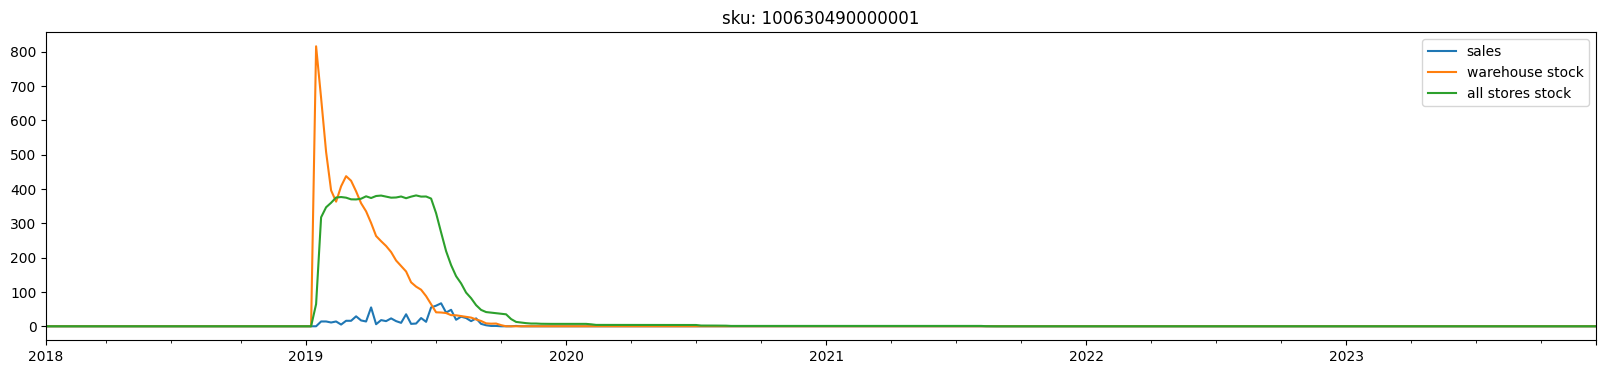

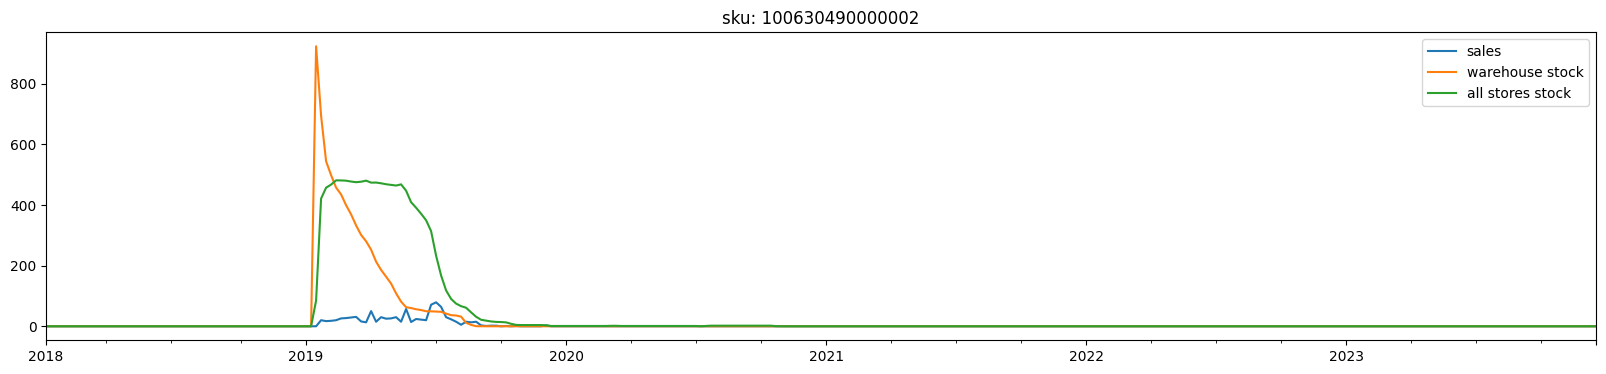

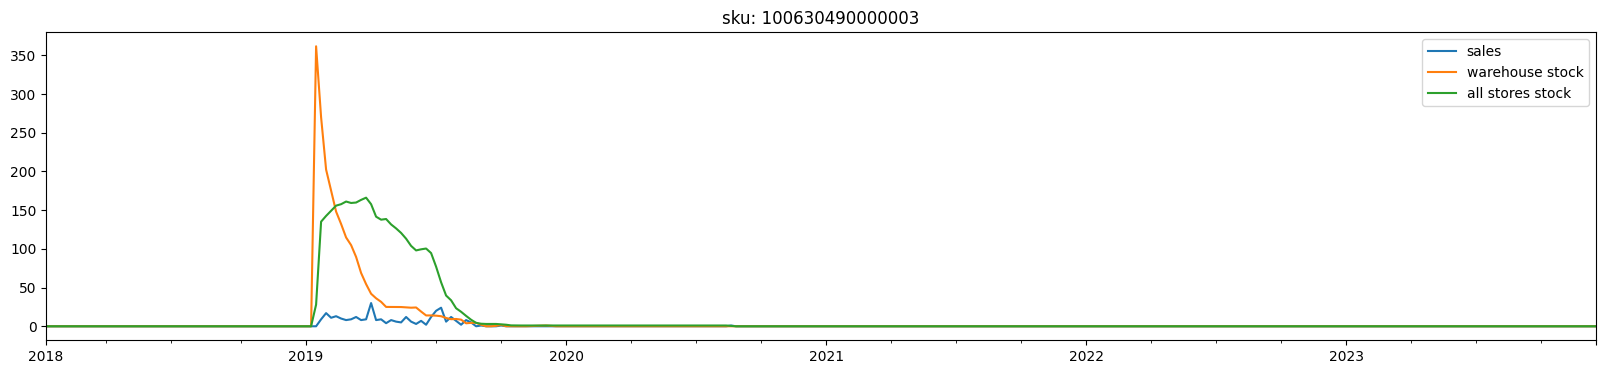

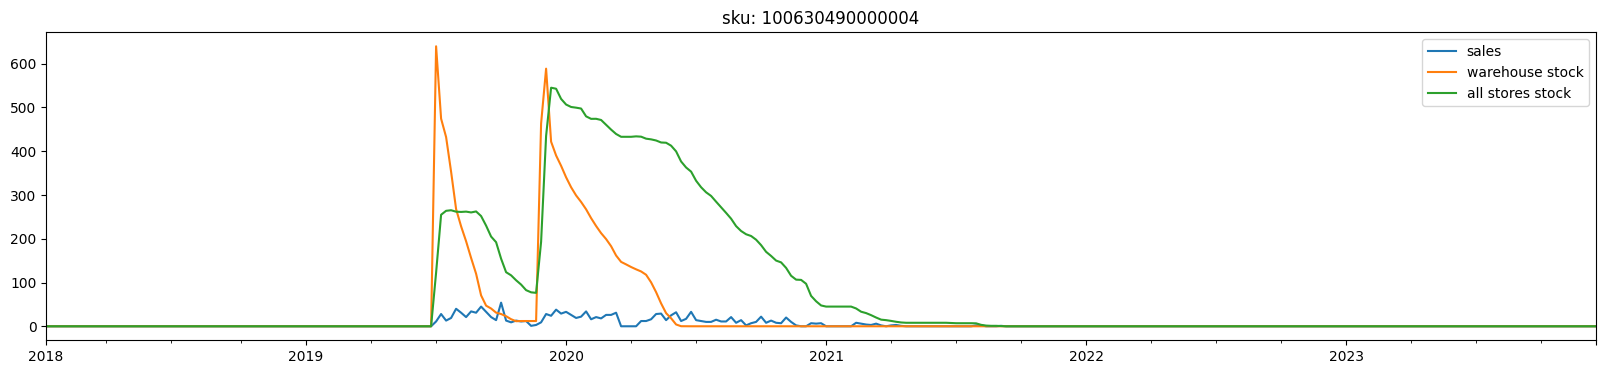

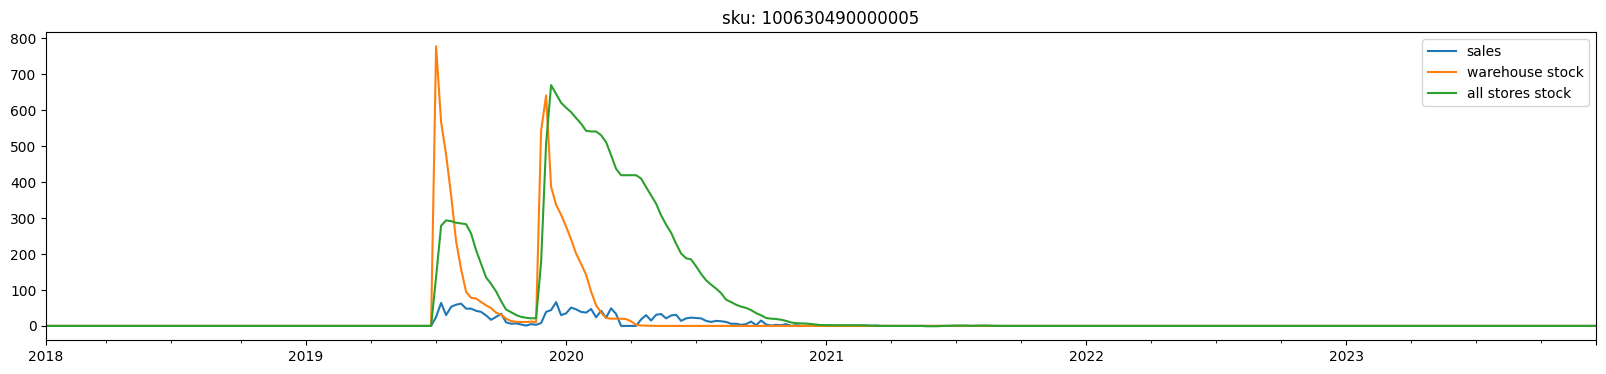

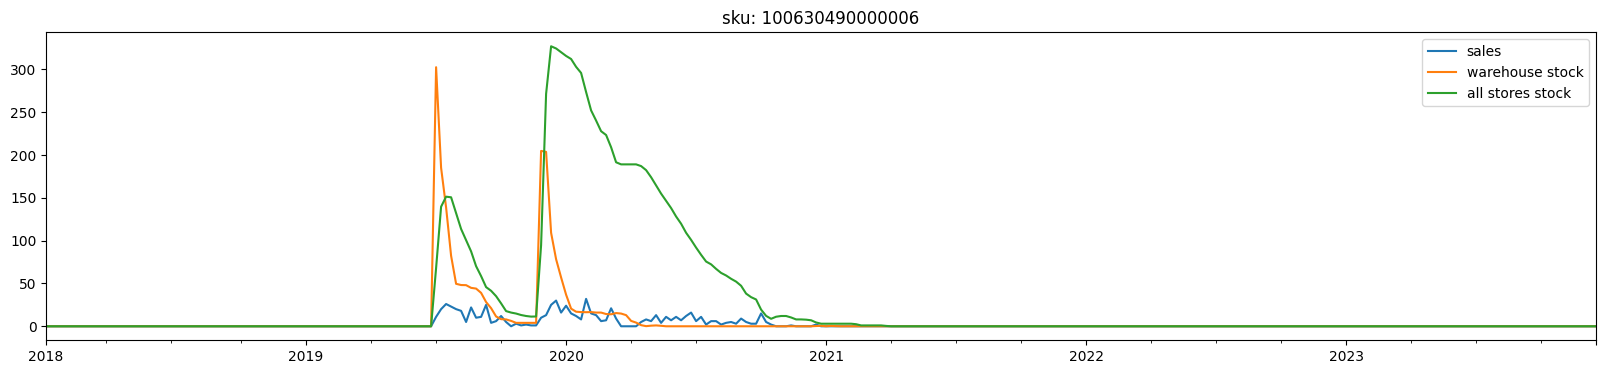

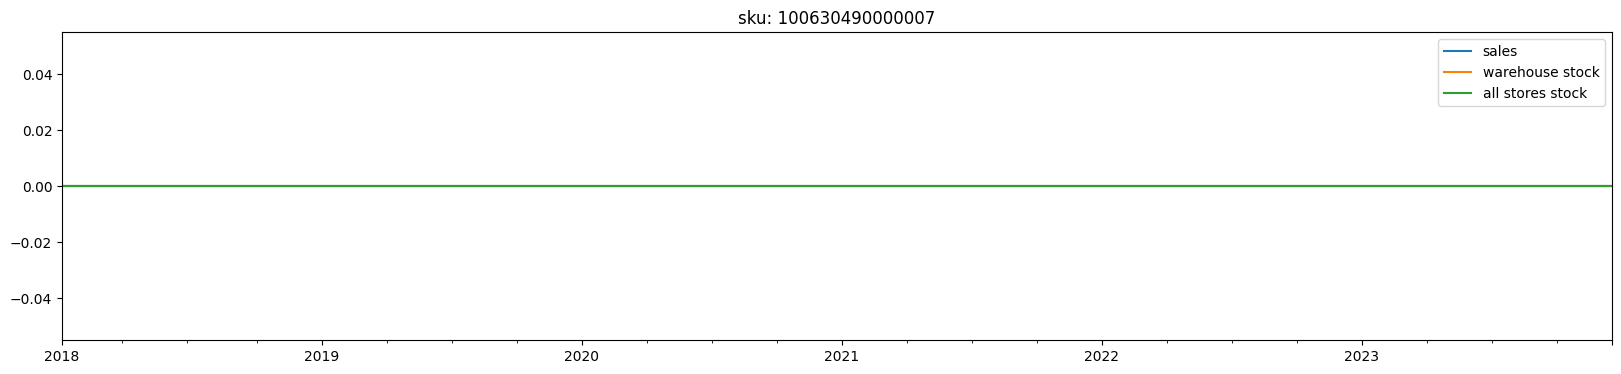

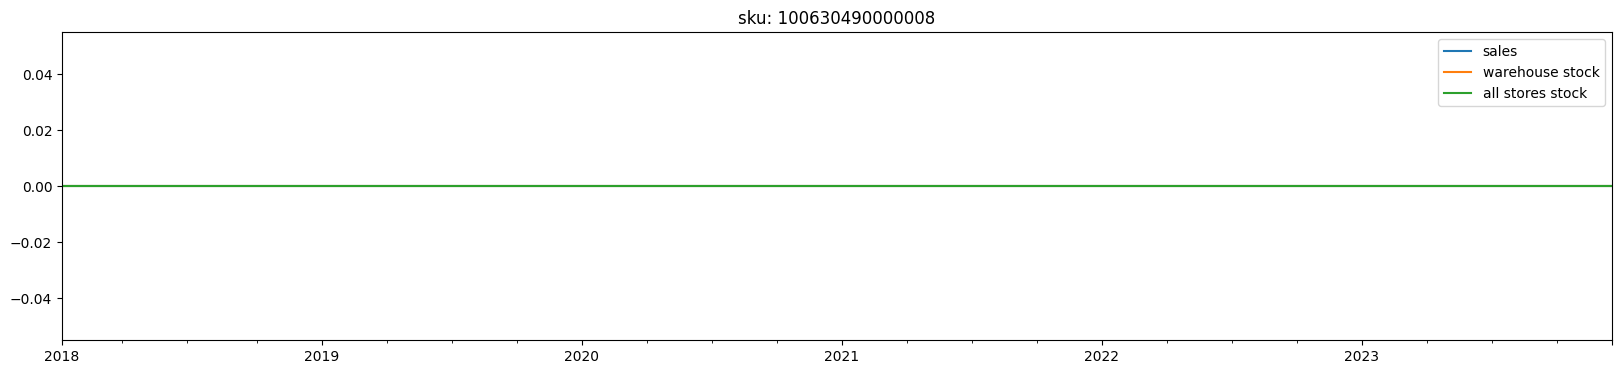

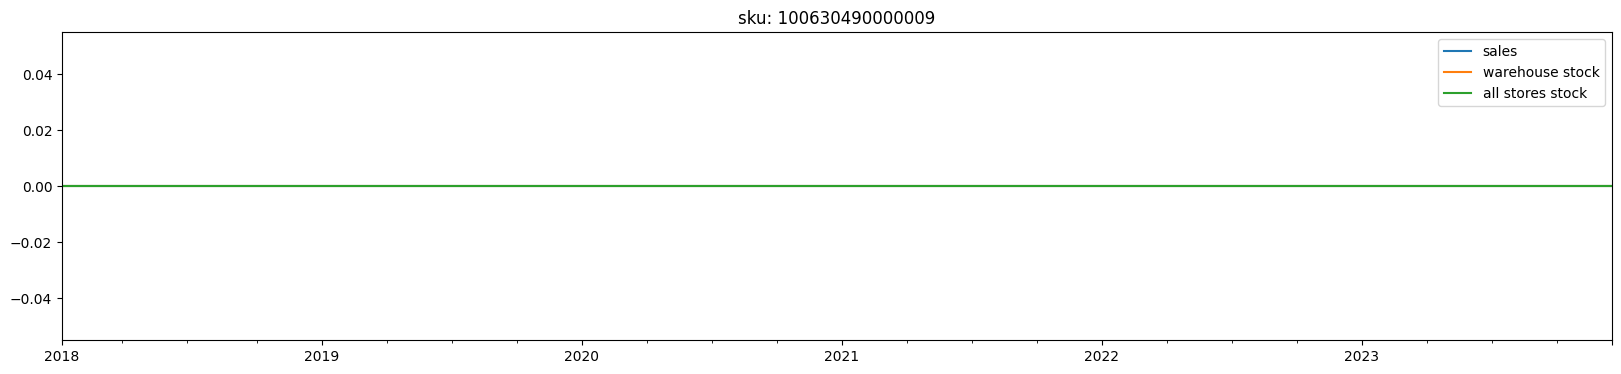

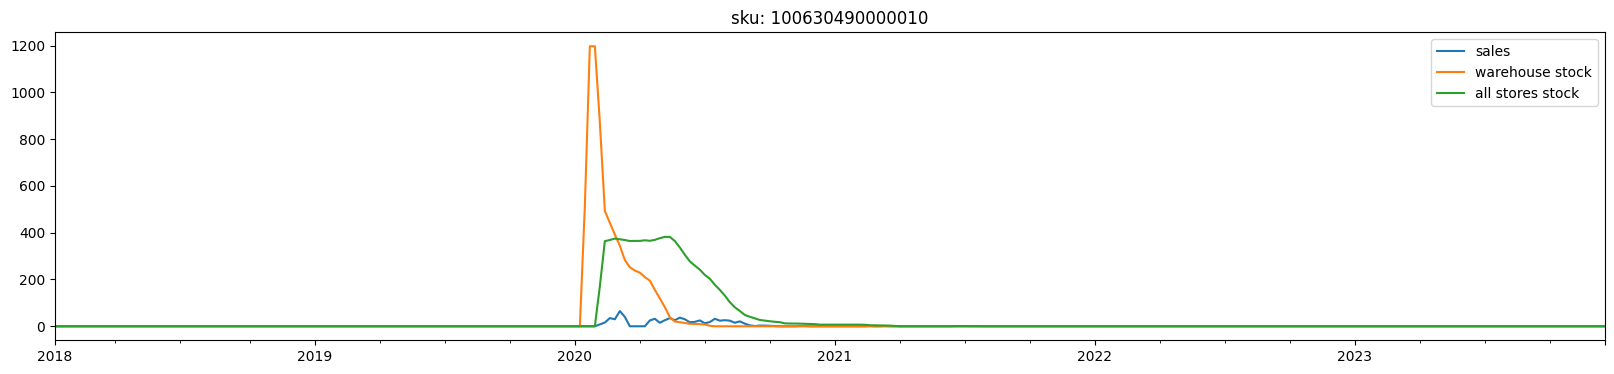

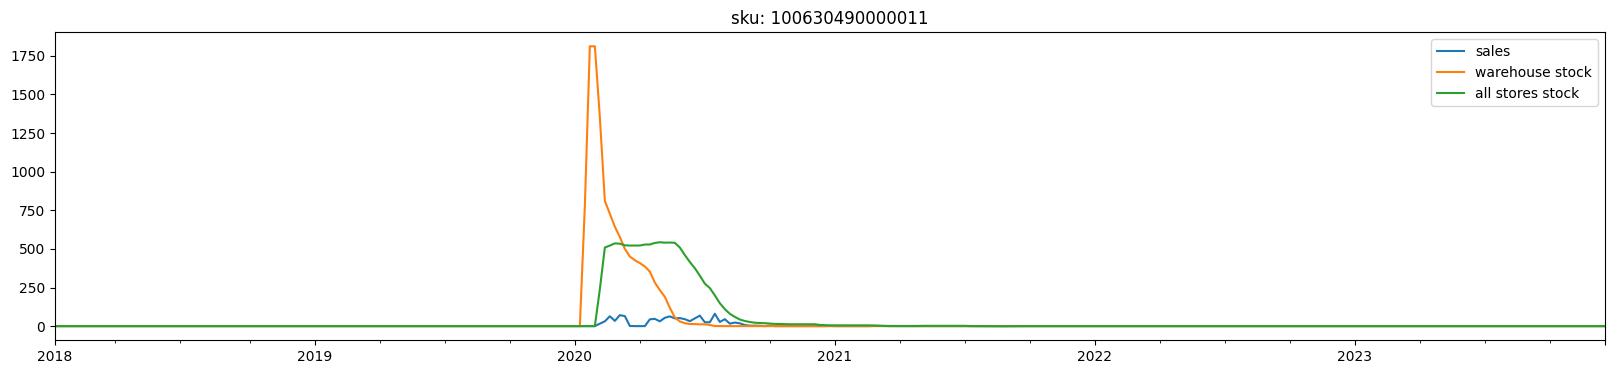

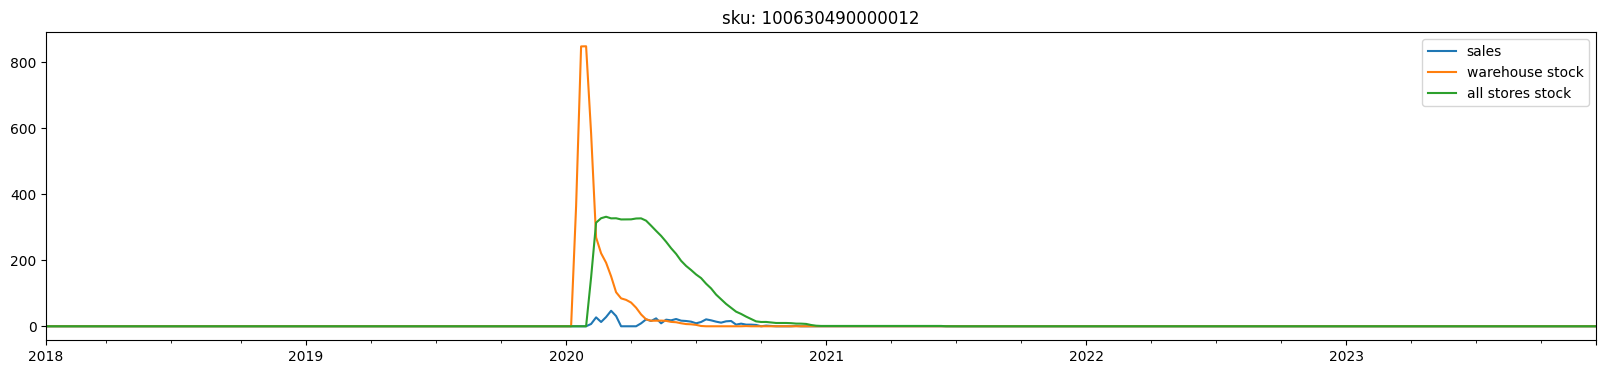

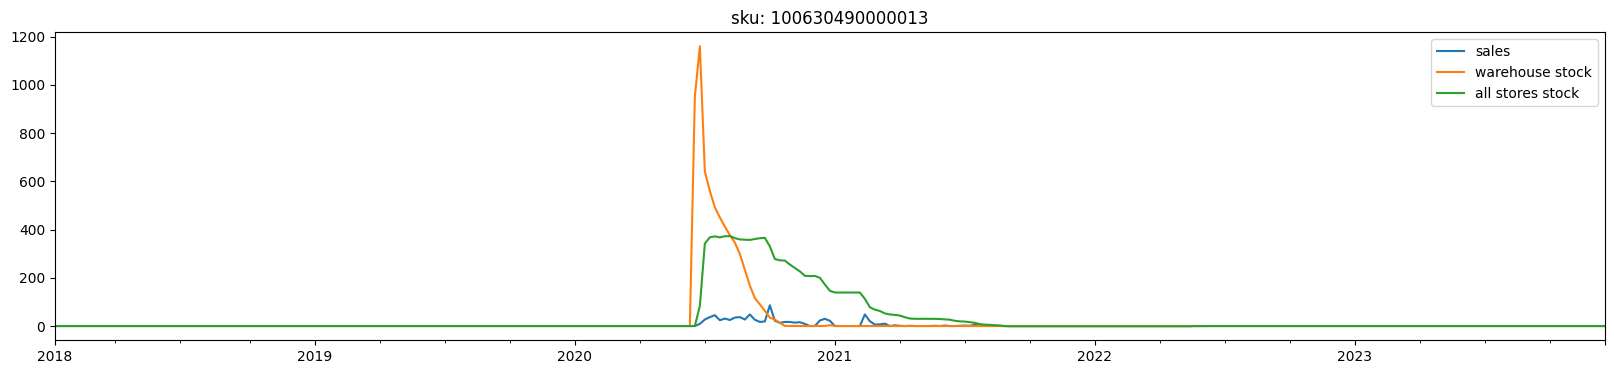

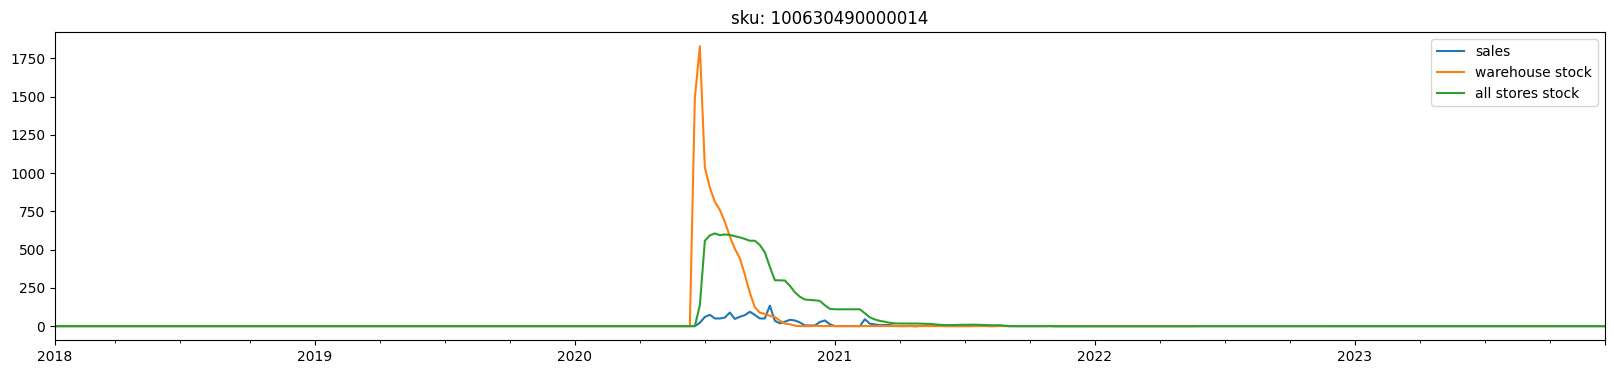

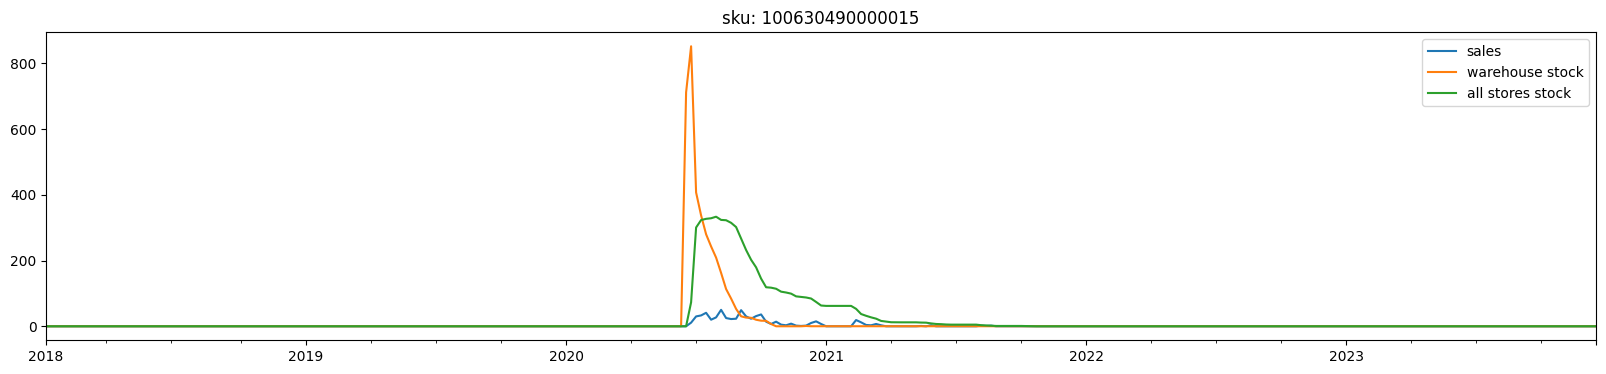

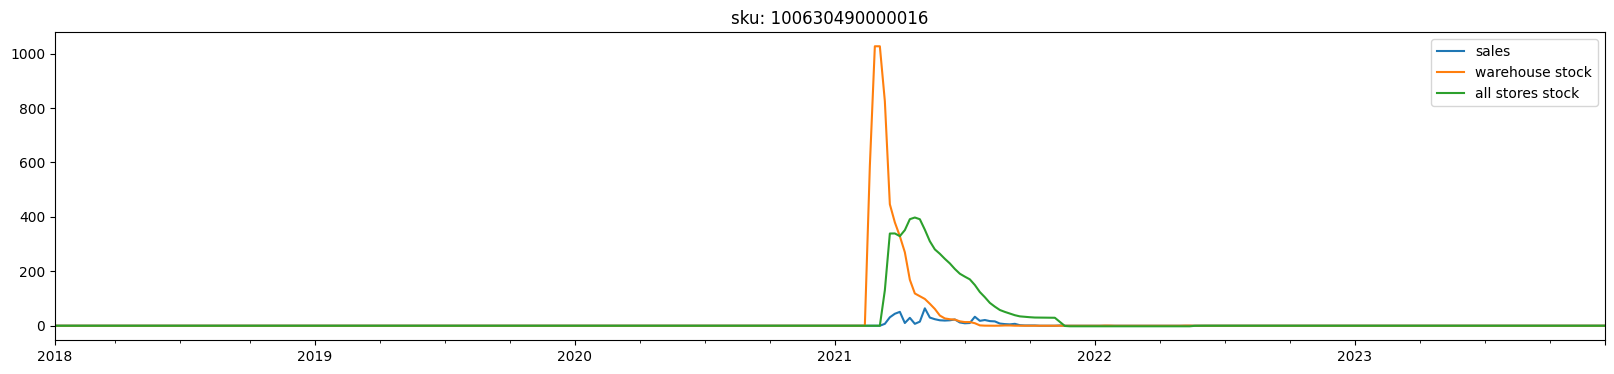

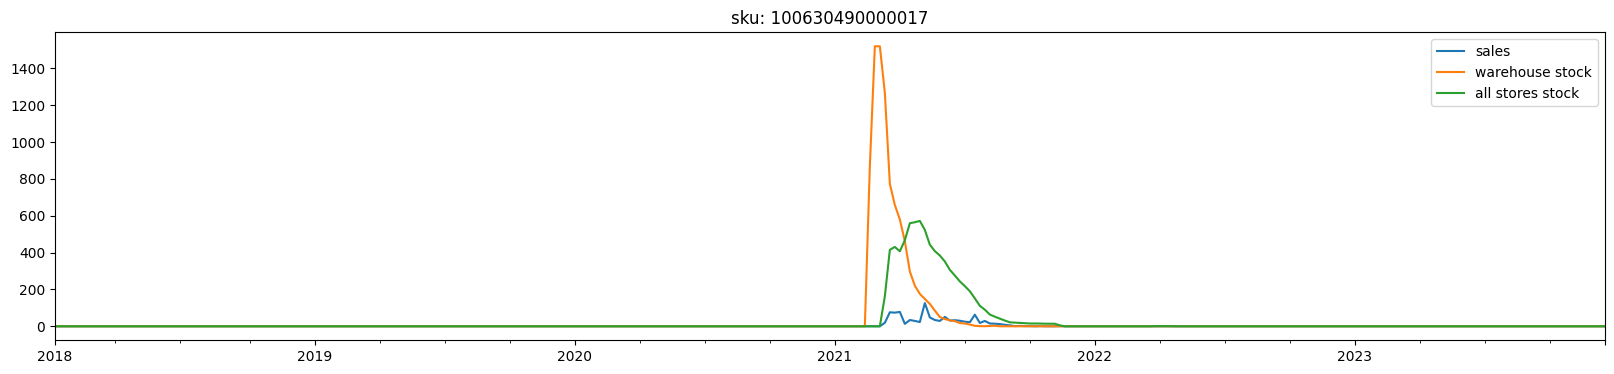

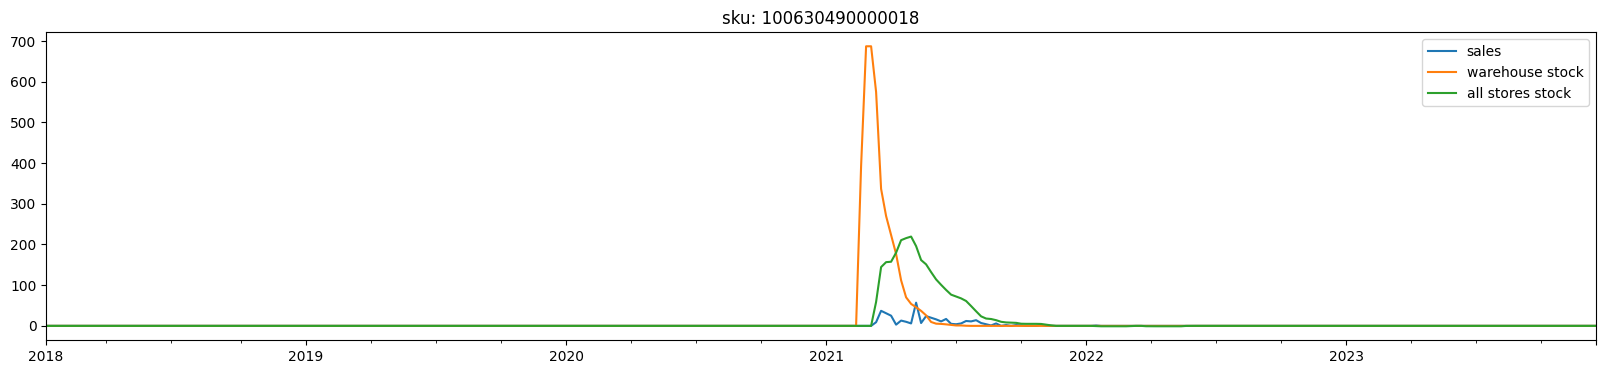

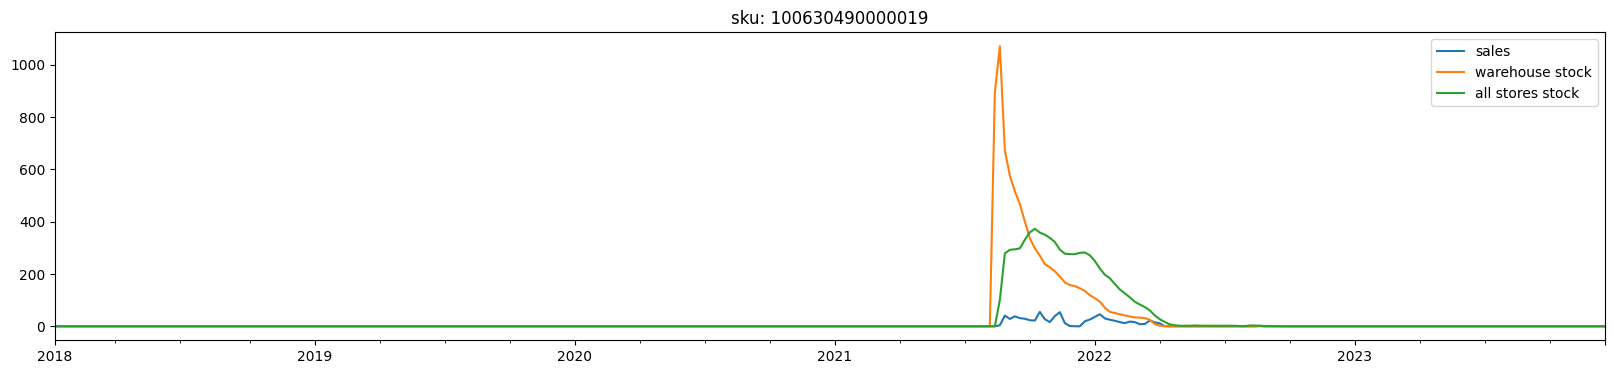

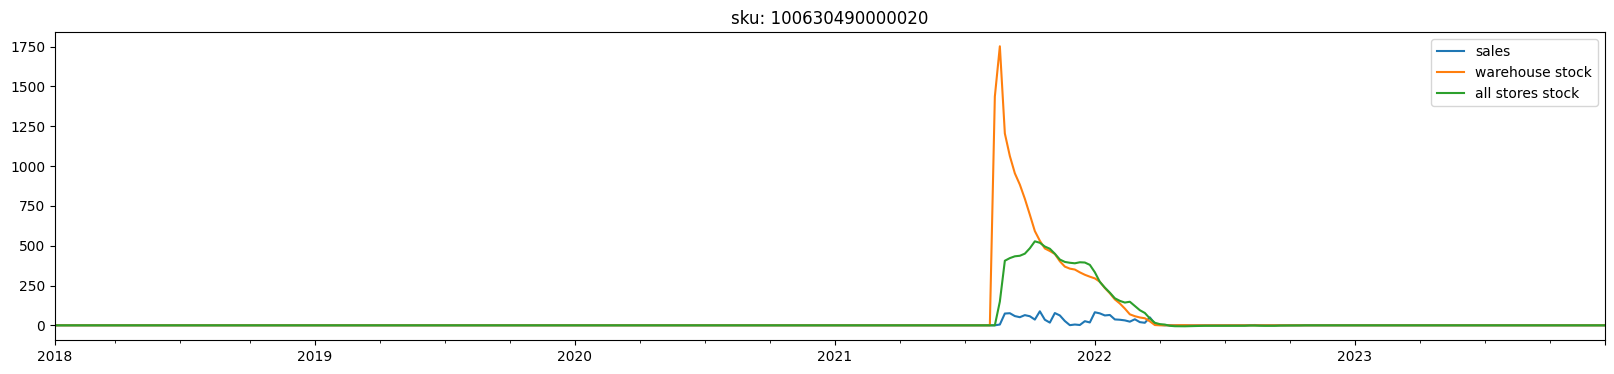

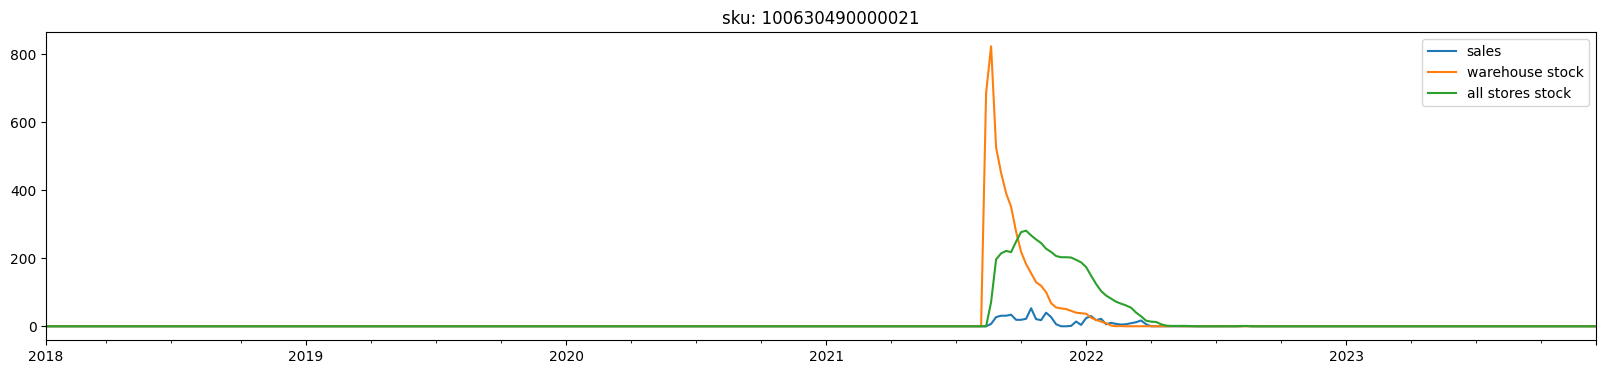

In [32]:
import matplotlib.pyplot as plt
for sku in [100630490000001, 100630490000002, 100630490000003, 100630490000004, 100630490000005, 100630490000006, 100630490000007, 100630490000008, 100630490000009, 100630490000010, 100630490000011, 100630490000012, 100630490000013, 100630490000014, 100630490000015, 100630490000016, 100630490000017, 100630490000018, 100630490000019, 100630490000020, 100630490000021,]:
    sku_data = sales_data[sales_data['sku'] == sku].groupby('date')['sales'].sum()
    sku_data = sku_data.reindex(pd.date_range(start=sales_data['date'].min(),
                                                # today
                                                end=sales_data['date'].max(),

                                                freq='D')).fillna(0)
    sku_warehouse = warehouse_data[warehouse_data['sku'].astype(str) == str(sku)].sort_values(by='valid_from_date')
    sku_warehouse_df_final = pd.DataFrame()
    for row in sku_warehouse.iterrows():
        sku_warehouse_df_final = pd.concat([sku_warehouse_df_final, pd.DataFrame({'date':pd.date_range(start=row[1]['valid_from_date'], end=row[1]['valid_to_date'], freq='D'), 'warehouse stock':row[1]['stock']})])
    sku_warehouse_df_final = sku_warehouse_df_final.set_index('date')
    relevant_sku_stores_stock = mbew_fashion[mbew_fashion['sku'] == sku]
    all_stores_sku_stock_data = {}
    for store in relevant_sku_stores_stock['store'].unique():
        store_sku_data = relevant_sku_stores_stock[relevant_sku_stores_stock['store'] == store]
        one_store_stock_sku_all = pd.DataFrame()
        for row in store_sku_data.iterrows():
            one_store_stock_sku = pd.DataFrame({'date':pd.date_range(start=row[1]['valid_from_date'],
                                                                     end=row[1]['valid_to_date'],
                                                                     freq='D'),
                                                'store stock':row[1]['stock']})
            one_store_stock_sku_all = pd.concat([one_store_stock_sku_all, one_store_stock_sku])
        one_store_stock_sku_all = one_store_stock_sku_all.set_index('date')
        all_stores_sku_stock_data[store] = one_store_stock_sku_all
        # merge all stores with outer join
    all_stores_final_stock_data = pd.DataFrame()
    for store in all_stores_sku_stock_data.keys():
        relevant_store_data_1 = all_stores_sku_stock_data[store]
        relevant_store_data_1 = relevant_store_data_1.rename(columns={'store stock':'store {}'.format(store) + ' stock'})
        all_stores_final_stock_data = pd.concat([all_stores_final_stock_data, relevant_store_data_1], axis=1, join='outer')
    all_store_sum_stock = all_stores_final_stock_data.sum(axis=1).to_frame().rename(columns={0:'all stores stock'})
    # merge by index
    sku_data = pd.merge(sku_data, sku_warehouse_df_final, left_index=True, right_index=True, how='left').fillna(0)
    sku_data = pd.merge(sku_data, all_store_sum_stock, left_index=True, right_index=True, how='left').fillna(0)
    sku_data_w = sku_data.resample('W').agg({'sales':'sum', 'warehouse stock':'mean', 'all stores stock':'mean'})
    sku_data_w.plot(figsize=(20,4))
    plt.title('sku: ' + str(sku))

    plt.show()

In [20]:
sku_warehouse = warehouse_data[warehouse_data['sku'].astype(str) == str(sku)].sort_values(by='valid_from_date')

In [29]:
sku

100630490000005

In [27]:
print(sku_warehouse.iloc[60:90])

       store              sku valid_from_date valid_to_date   stock
466536  VZ01  100630490000005      2019-11-15    2019-11-18    11.0
468340  VZ01  100630490000005      2019-11-19    2019-11-27    10.0
473330  VZ01  100630490000005      2019-11-28    2019-11-28  1274.0
473439  VZ01  100630490000005      2019-11-29    2019-11-29   963.0
473606  VZ01  100630490000005      2019-11-30    2019-12-02   764.0
473711  VZ01  100630490000005      2019-12-03    2019-12-03   732.0
473828  VZ01  100630490000005      2019-12-04    2019-12-04   722.0
473915  VZ01  100630490000005      2019-12-05    2019-12-05   672.0
474033  VZ01  100630490000005      2019-12-06    2019-12-06   666.0
474183  VZ01  100630490000005      2019-12-07    2019-12-09   464.0
474287  VZ01  100630490000005      2019-12-10    2019-12-10   417.0
474401  VZ01  100630490000005      2019-12-11    2019-12-11   378.0
474514  VZ01  100630490000005      2019-12-12    2019-12-12   369.0
474621  VZ01  100630490000005      2019-12-13   

In [143]:
3warehouse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370481 entries, 0 to 1370480
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   store            1370481 non-null  object 
 1   sku              1370481 non-null  int64  
 2   valid_from_date  1370481 non-null  object 
 3   valid_to_date    1370481 non-null  object 
 4   stock            1370481 non-null  float64
 5   fashiongrade     1370481 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 62.7+ MB


In [142]:
sku_warehouse_df_final

""


In [116]:
print(100630490000005)

            sales  warehouse stock  all stores stock
2018-01-01    0.0              0.0               0.0
2018-01-02    0.0              0.0               0.0
2018-01-03    0.0              0.0               0.0
2018-01-04    0.0              0.0               0.0
2018-01-05    0.0              0.0               0.0
...           ...              ...               ...
2023-12-06    0.0              0.0               0.0
2023-12-07    0.0              0.0               0.0
2023-12-08    0.0              0.0               0.0
2023-12-09    0.0              0.0               0.0
2023-12-10    0.0              0.0               0.0

[2170 rows x 3 columns]


In [27]:
sku_data

2018-01-01    0.0
2018-01-02    0.0
2018-01-03    0.0
2018-01-04    0.0
2018-01-05    0.0
             ... 
2023-12-06    0.0
2023-12-07    0.0
2023-12-08    0.0
2023-12-09    0.0
2023-12-10    0.0
Freq: D, Name: sales, Length: 2170, dtype: float64